In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import pearsonr

In [19]:
data=pd.read_csv("C:/Users/madhan/Downloads/train.csv")

In [20]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [21]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [22]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
data.drop(['blue','dual_sim','mobile_wt','px_height','px_width','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'],axis=1,inplace=True)

In [26]:
data.isnull().sum()

battery_power    0
clock_speed      0
fc               0
four_g           0
int_memory       0
m_dep            0
n_cores          0
pc               0
ram              0
price_range      0
dtype: int64

In [41]:
data.head()

,battery_power,clock_speed,fc,four_g,int_memory,m_dep,n_cores,pc,ram,price_range
0,842,2.2,1,0,7,0.6,2,2,2549,1
1,1021,0.5,0,1,53,0.7,3,6,2631,2
2,563,0.5,2,1,41,0.9,5,6,2603,2
3,615,2.5,0,0,10,0.8,6,9,2769,2
4,1821,1.2,13,1,44,0.6,2,14,1411,1


In [69]:
data.price_range=data.price_range.replace(0,1)

In [71]:
data.price_range=data.price_range.replace(1,">=1")

In [ ]:
data.price_range=data.price_range.replace(3,2)

In [85]:
data.price_range=data.price_range.replace(3,">4")

<AxesSubplot:xlabel='price_range', ylabel='count'>

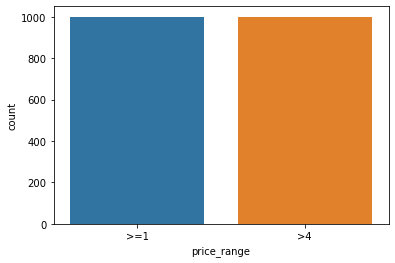

In [100]:
sns.countplot(x="price_range",data=data)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   four_g         2000 non-null   int64  
 4   int_memory     2000 non-null   int64  
 5   m_dep          2000 non-null   float64
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   ram            2000 non-null   int64  
 9   price_range    2000 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 156.4+ KB


In [29]:
data.head()

,battery_power,clock_speed,fc,four_g,int_memory,m_dep,n_cores,pc,ram,price_range
0,842,2.2,1,0,7,0.6,2,2,2549,1
1,1021,0.5,0,1,53,0.7,3,6,2631,2
2,563,0.5,2,1,41,0.9,5,6,2603,2
3,615,2.5,0,0,10,0.8,6,9,2769,2
4,1821,1.2,13,1,44,0.6,2,14,1411,1


In [103]:
data.price_range.value_counts()

>=1    1000
>4     1000
Name: price_range, dtype: int64

In [88]:
x=data.drop(['price_range'],axis=1)

In [89]:
y=data.price_range

In [90]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [91]:
train_x.shape

(1600, 9)

In [92]:
train_y.shape

(1600,)

In [93]:
clf = LogisticRegression().fit(train_x, train_y)

C:\Users\Abishek bhat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
clf.predict(test_x)

array(['>=1', '>4', '>=1', '>4', '>4', '>4', '>4', '>=1', '>4', '>4',
       '>=1', '>=1', '>4', '>4', '>=1', '>=1', '>4', '>4', '>4', '>=1',
       '>=1', '>=1', '>=1', '>=1', '>=1', '>4', '>4', '>4', '>4', '>=1',
       '>=1', '>=1', '>4', '>=1', '>4', '>4', '>4', '>=1', '>4', '>=1',
       '>4', '>4', '>4', '>=1', '>4', '>4', '>4', '>=1', '>4', '>=1',
       '>4', '>=1', '>=1', '>=1', '>=1', '>=1', '>=1', '>4', '>=1', '>=1',
       '>=1', '>4', '>4', '>4', '>=1', '>=1', '>4', '>4', '>=1', '>4',
       '>4', '>4', '>=1', '>=1', '>4', '>=1', '>=1', '>4', '>4', '>4',
       '>4', '>4', '>4', '>=1', '>4', '>4', '>4', '>4', '>4', '>=1', '>4',
       '>4', '>4', '>=1', '>4', '>4', '>=1', '>4', '>4', '>4', '>=1',
       '>=1', '>=1', '>=1', '>=1', '>4', '>4', '>=1', '>4', '>4', '>=1',
       '>=1', '>=1', '>=1', '>4', '>4', '>4', '>4', '>=1', '>4', '>=1',
       '>4', '>4', '>4', '>4', '>4', '>=1', '>4', '>=1', '>4', '>4',
       '>=1', '>=1', '>4', '>=1', '>4', '>=1', '>=1', '>=1', '>4', 

In [95]:
clf.score(test_x,test_y)

0.87

In [96]:
confusion_matrix(test_y,clf.predict(test_x))

array([[185,  19],
       [ 33, 163]], dtype=int64)